In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("top_leagues_teams_stats/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("top_leagues_teams_stats/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("top_leagues_teams_stats/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("top_leagues_teams_stats/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("top_leagues_teams_stats/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

2018 - 2019

In [4]:
df_teams_last_first = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [5]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [6]:
df_teams_last_17_18 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [7]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [8]:
df_teams_last_16_17 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [9]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [10]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [11]:
df_league_climbers = pd.concat([df_nueremberg, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [12]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [13]:
df_total.shape

(104, 280)

In [14]:
from pandas.plotting import scatter_matrix

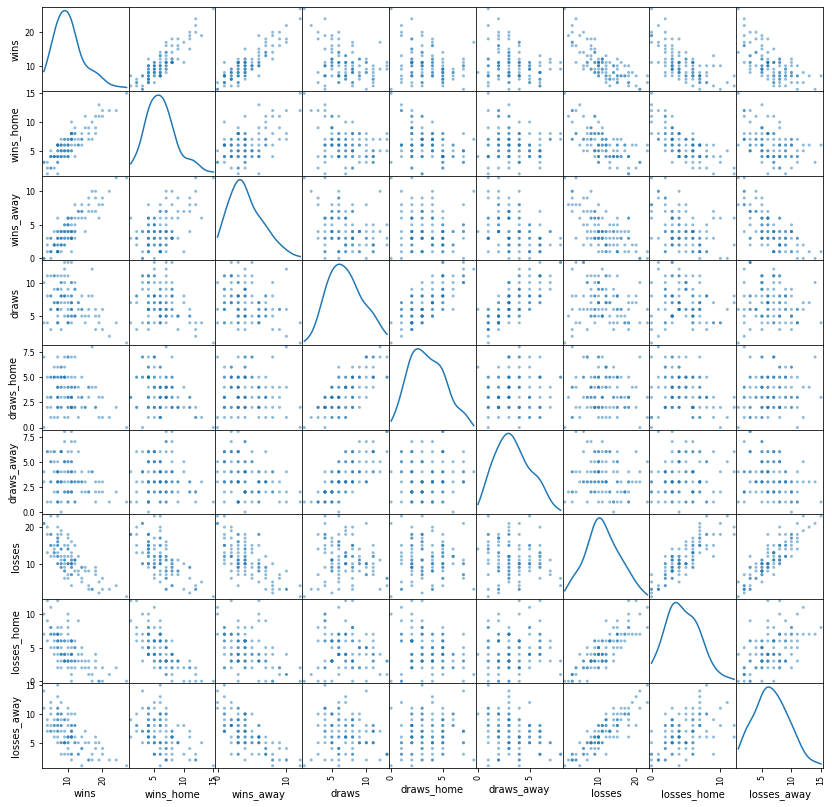

In [15]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [16]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [17]:
df_teams_numerical = df_all.iloc[8:,:]

In [18]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [19]:
X = df_norm.as_matrix()

## AA Analysis

In [20]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 4.424277034792321
RSS = 3.8990649363044088
RSS = 3.704361095314318
RSS = 3.600796934965401
RSS = 3.5328578791290375
RSS = 3.4959199482916294
RSS = 3.478525203175613
RSS = 3.469887971968713
RSS = 3.4648169866620204
RSS = 3.4620425602144596
RSS = 3.460551325795189
RSS = 3.459676522237766
RSS = 3.4589938994589287
RSS = 3.458597210645722
RSS = 3.458346102843331
RSS = 3.458242575540243
RSS = 3.458088903021456
RSS = 3.4580663742874855
RSS = 3.4580289185169826
RSS = 3.4580251205208814
RSS = 3.458011566330903
RSS = 3.458035602622531
RSS = 3.4580185527871756
RSS = 3.457991372422257
RSS = 3.457940504031497
RSS = 3.4580084353667826
RSS = 3.4579963865729866
RSS = 3.4579793238216414
RSS = 3.457999329694565
RSS = 3.4580351526365454
RSS = 3.4579981239838413
RSS = 3.458059079143399
RSS = 3.457977963399579
RSS = 3.458018221326545
RSS = 3.4580039119095676
RSS = 3.4579960249991304
RSS = 3.458002262407908
RSS = 3.458000833383767
RSS = 3.458009303509842
RSS = 3.457989899136259
RSS = 3.458019657717395

In [21]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

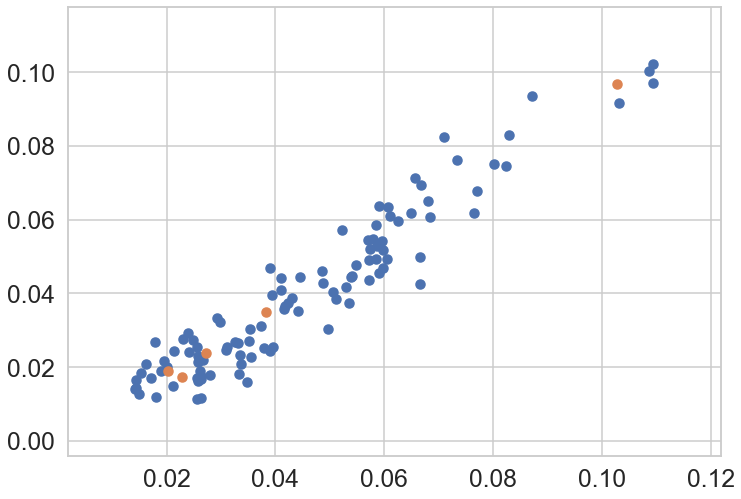

In [22]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

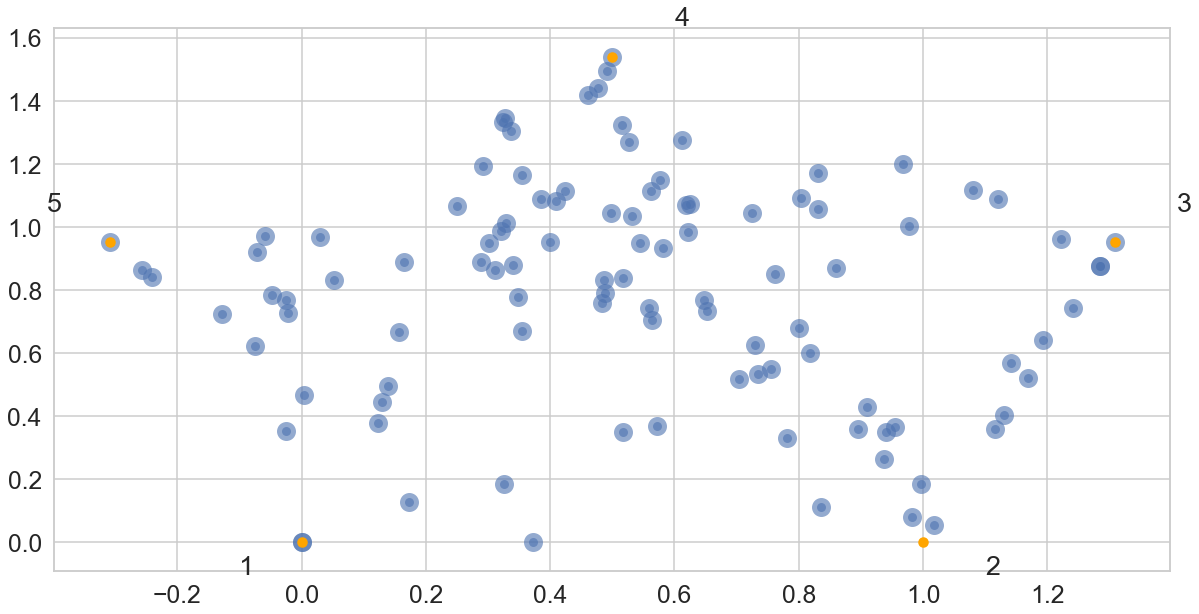

In [23]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [24]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [25]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.200 0.685 0.114 0.001 0.000 
1. FC Union Berlin                      0.000 0.942 0.058 0.000 0.000 
1. FSV Mainz 05                         0.173 0.459 0.368 0.000 0.000 
BVB 09 Borussia Dortmund                1.000 0.000 0.000 0.000 0.000 
Bayer 04 Leverkusen                     1.000 0.000 0.000 0.000 0.000 
Borussia VfL Mönchengladbach            0.627 0.373 0.000 0.000 0.000 
Düsseldorfer TuS Fortuna 1895           0.044 0.359 0.597 0.000 0.000 
Eintracht Frankfurt                     0.733 0.075 0.192 0.000 0.000 
FC Augsburg                             0.229 0.322 0.449 0.000 0.000 
FC Bayern München                       0.423 0.000 0.000 0.577 0.000 
FC Schalke 04                           0.048 0.575 0.270 0.000 0.107 
Hertha BSC                              0.043 0.872 0.085 0.000 0.000 
Rasen Ballsport Leipzig                 0.867 0.000 0.132 0.002 0.000 
SC Freiburg                             0.479 0.000 0.185 0.000 0.336 
SC Pad

## Merge Result with original dataframe

In [26]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [27]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [28]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.199668,0.684917,0.114463,0.000952,0.000000,Köln
1,0.000000,0.942126,0.057807,0.000066,0.000000,Union Berlin
2,0.173311,0.459136,0.367508,0.000044,0.000000,Mainz 05
3,1.000000,0.000000,0.000000,0.000000,0.000000,Borussia Dortmund
4,1.000000,0.000000,0.000000,0.000000,0.000000,Bayer Leverkusen
...,...,...,...,...,...,...
99,0.000000,0.219424,0.780576,0.000000,0.000000,Hannover 96
100,0.000000,0.078250,0.921750,0.000000,0.000000,Stuttgart
101,0.000000,0.617187,0.281107,0.000421,0.101285,Hamburger SV
102,0.000000,0.623256,0.376744,0.000000,0.000000,Darmstadt 98


## Save Result as Pickle file

In [29]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")